In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and Inspect the Data

In [5]:
data= pd.read_csv('s&p500.csv', parse_dates=['Date'])

In [6]:
data.head()

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1871-01-01,4.44,0.26,0.4,12.46,5.32,89.00,5.21,8.02,NaN
1,1871-02-01,4.50,0.26,0.4,12.84,5.32,87.53,5.06,7.78,NaN
2,1871-03-01,4.61,0.26,0.4,13.03,5.33,88.36,4.98,7.67,NaN
3,1871-04-01,4.74,0.26,0.4,12.56,5.33,94.29,5.17,7.96,NaN
4,1871-05-01,4.86,0.26,0.4,12.27,5.33,98.93,5.29,8.14,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1768 non-null   datetime64[ns]
 1   SP500                 1768 non-null   float64       
 2   Dividend              1767 non-null   float64       
 3   Earnings              1764 non-null   float64       
 4   Consumer Price Index  1768 non-null   float64       
 5   Long Interest Rate    1768 non-null   float64       
 6   Real Price            1768 non-null   float64       
 7   Real Dividend         1767 non-null   float64       
 8   Real Earnings         1764 non-null   float64       
 9   PE10                  1648 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 138.2 KB


In [9]:
data.isna().sum()

Date                      0
SP500                     0
Dividend                  1
Earnings                  4
Consumer Price Index      0
Long Interest Rate        0
Real Price                0
Real Dividend             1
Real Earnings             4
PE10                    120
dtype: int64

In [12]:
ts_data= data[['Date', 'SP500']]
ts_data.set_index('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

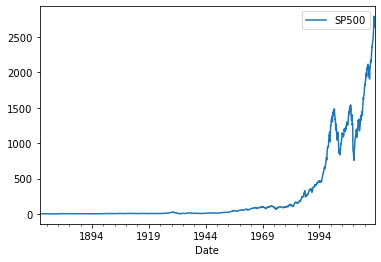

In [15]:
ts_data.plot()

In [27]:
ts_data

,SP500
Date,
1871-01-01,4.44
1871-02-01,4.50
1871-03-01,4.61
1871-04-01,4.74
1871-05-01,4.86
...,...
2017-12-01,2664.34
2018-01-01,2789.80
2018-02-01,2705.16


In [32]:
print("start date: ", ts_data.index.min())
print("end date: ", ts_data.index.max())
print('frequency: ', ts_data.index.freqstr)

start date:  1871-01-01 00:00:00
end date:  2018-04-01 00:00:00
frequency:  None


# Statistical Test & Plots

Text(0.5, 1.0, 'Auto-correlation plot')

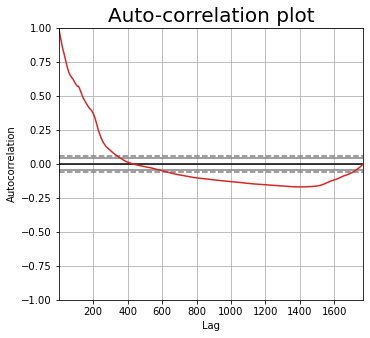

In [41]:
# check for randomness
from pandas.plotting import autocorrelation_plot, lag_plot

plt.plot(1, 2, 2)
autocorrelation_plot(ts_data)
plt.title('Auto-correlation plot', size=20)

Text(0.5, 1.0, 'Lag Plot')

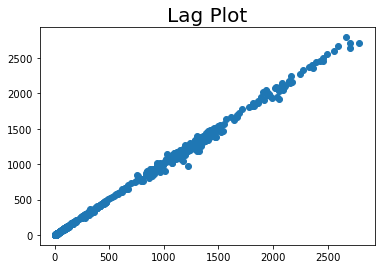

In [44]:
plt.plot(ts_data, ts_data.shift(-1), 'o')
plt.title('Lag Plot', size=20)

In [74]:
# test for stationarity
def adf_report(data):
    from statsmodels.tsa.stattools import adfuller 
    adfullerreport = adfuller(data) 
    adfullerreportdata = pd.DataFrame(adfullerreport[0:4],columns = ["Values"], 
                                  index=["ADF F% statistics",
                                         "P-value",  
                                         "No. of lags used",
                                         "No. of observations"]
                                 )
    if adfullerreportdata.values[1] < 0.05:
        test= 'data is staionary'
    else:
        test= 'data is not stationary'

    return adfullerreportdata, test

In [75]:
adf_report(ts_data)

(                          Values
 ADF F% statistics       3.603097
 P-value                 1.000000
 No. of lags used       25.000000
 No. of observations  1742.000000,
 'data is not stationary')

In [81]:
# autocorrelation & correlation function

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.api import seasonal_decompose

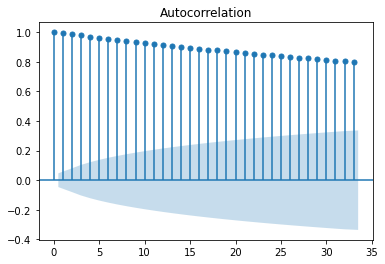

In [78]:
plot_acf(ts_data,);

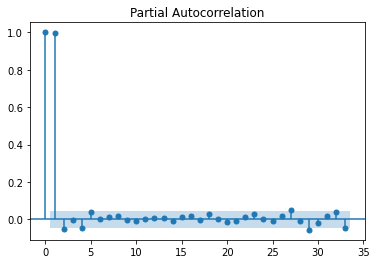

In [80]:
plot_pacf(ts_data);

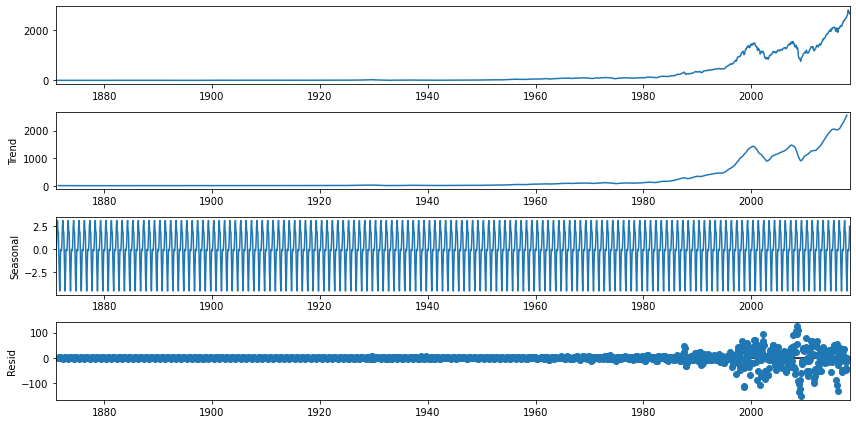

In [85]:
# Time series decomposition
plt.rcParams['figure.figsize'] =(12, 6)
d = seasonal_decompose(ts_data)
d.plot();